<a href="https://colab.research.google.com/github/luca-arts/seeingtheimperceptible/blob/main/notebooks/skinRetouching/tests/retouchML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Face Smoothing Detection and Beautification with StyleGAN2


https://github.com/ju-leon/RetouchML

1. First make sure you select **GPU** as runtime type under Runtime > Runtime Type


2. Linking next cloud

In [1]:
# we'll link the dataset from next-cloud
!curl https://raw.githubusercontent.com/luca-arts/seeingtheimperceptible/main/notebooks/database_mod.py -o /content/database_mod.py

from database_mod import *

link_nextcloud()

nextcloud = '/content/database/'

#input_folder, output_folder = create_io(database=nextcloud,topic='skinRetouching',library='retouchML')
input_folder, output_folder = create_io(database=nextcloud,topic='skinRetouching/retouchML',library='retouchML')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2235  100  2235    0     0  13070      0 --:--:-- --:--:-- --:--:-- 13070
what's the username for nextcloud? colab
what's the password for user colab? ··········
0
Please enter the username to authenticate with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Username: Please enter the password to authenticate user colab with server
https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ or hit enter for none.
  Password:  
content of /etc/fstab: https://cloud.bxlab.net/remote.php/dav/files/colab/colabfiles/ /content/database davfs user,rw,auto 0 0
/content/database/skinRetouching/retouchML/input


3. Clone Git repository

In [ ]:
import os
root_path = '/content/retouchML'
# clone the repository
if not os.path.exists('retouchML'):
  !git clone https://github.com/ju-leon/RetouchML {root_path}

4. Installing a smart progress bar

In [ ]:
# Instantly make your loops show a smart progress meter - just wrap any iterable with tqdm(iterable), and you're done!
# means "progress" in Arabic (taqadum, تقدّم) and is an abbreviation for "I love you so much" in Spanish (te quiero demasiado).

#!pip install --force tqdm==4.24.0
#!pip install --force tqdm==4.63.0
!pip install tqdm

In [ ]:
# numpy versions from 1.20 throw an error further down the road, might need to restart the runtime.
!pip install numpy==1.19.5

5. Tensorflow version check

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


6. Getting started

creating different folders:
- aligned_images
- raw_images == input_folder
- alignement_vector
- out == output_folder

In [ ]:
%cd {root_path}

# make folders
!mkdir aligned_images alignement_vector

%ls

/content/retouchML
mkdir: cannot create directory ‘aligned_images’: File exists
mkdir: cannot create directory ‘alignement_vector’: File exists
 adaptive.py            ffhq_dataset/                __pycache__/
 aligned_images/        fit_faces.py                 README.md*
 alignement_vector/     generated_images/            registry.py
 align_images.py*      'Hand Labeler.ipynb'          robust_loss/
'Beautify ALAE.ipynb'   latent_representations/      run_generator.py*
 Beautify.ipynb         launcher.py                  run_metrics.py*
 custom_adam.py         Learn_Attractiveness.ipynb   run_projector.py*
 data/                  LICENSE.txt*                 run_training.py*
 dataloader.py          lreq.py                      scheduler.py
 dataset_tool.py*       masks/                       swa.py
 defaults.py            metrics/                     test_nvcc.cu*
 dnnlib/                model.py                     tracker.py
 Dockerfile*            net.py                       trai

7. Define the input folder


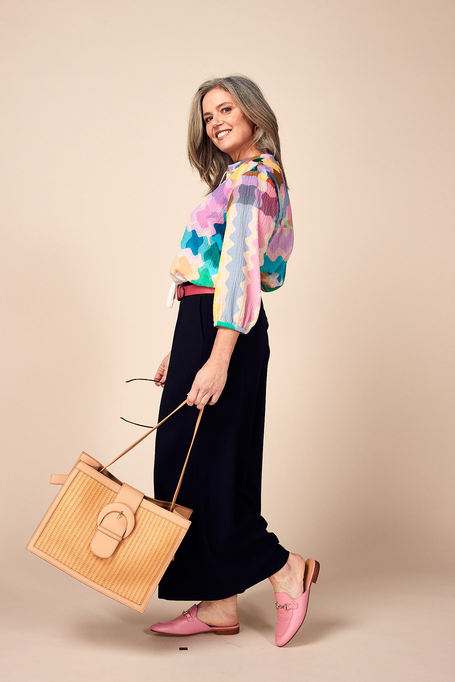

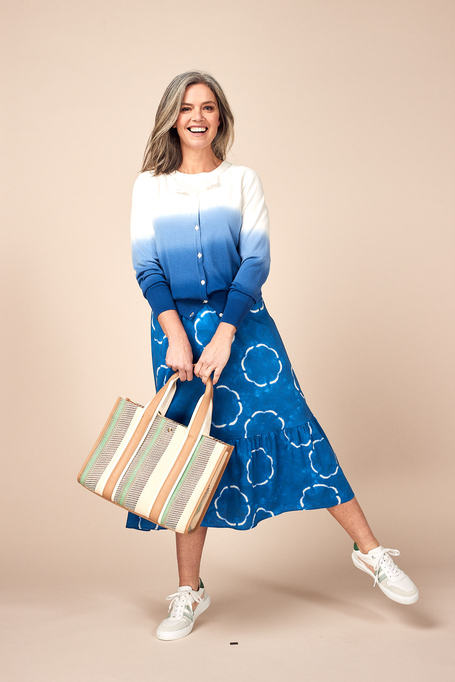

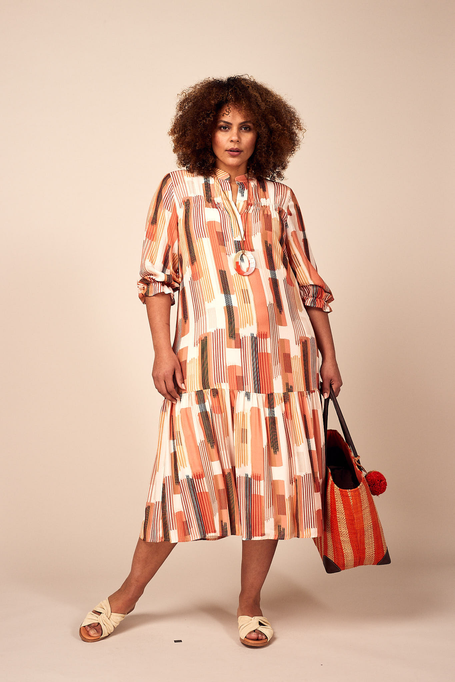

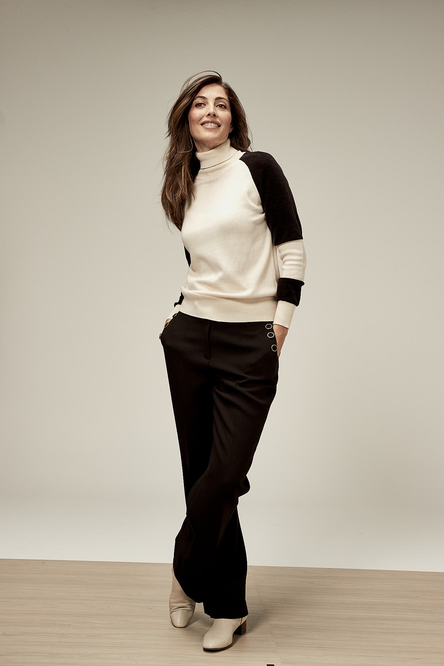

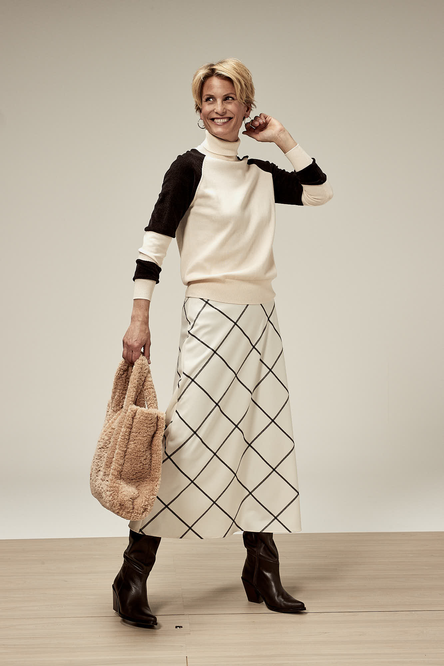

In [ ]:
import glob, os
import PIL.Image

# define which images extensions are valid
valid_images = (".jpg",".png")

for f in os.listdir(input_folder):
    if f.endswith(valid_images):
        img = PIL.Image.open(os.path.join(input_folder,f))
        display(img.resize((int(img.size[0]/3), int(img.size[1]/3)), PIL.Image.LANCZOS))


8. Aligning images

Run the following scripts to crop and see the results.

In [ ]:
!python align_images.py {input_folder} aligned_images/ alignement_vector/

Using TensorFlow backend.


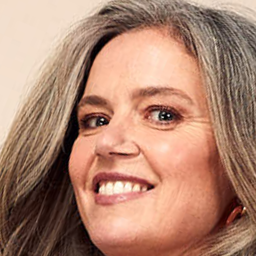

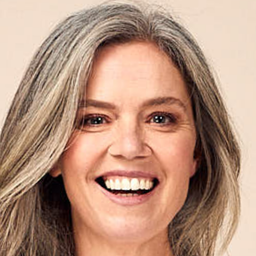

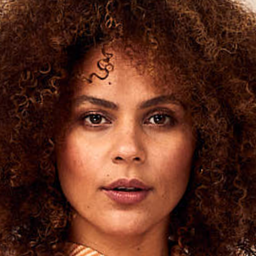

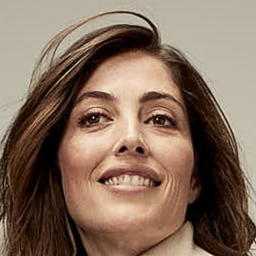

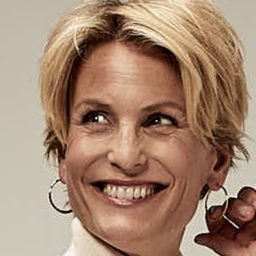

In [ ]:
align_path = 'aligned_images/'

# images are last -> first, sorting them from first -> last
for f in sorted(os.listdir(align_path)):
    if f.endswith(valid_images):
        img = PIL.Image.open(align_path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

9. Encoding

We need to translate what we can see into a latent vector.
We will use a StyleGan encoder.

This will take a while, so sit back and let Googles GPU do their jobs...

In [ ]:
!python encode_images.py --help

Using TensorFlow backend.
usage: encode_images.py [-h] [--data_dir DATA_DIR] [--mask_dir MASK_DIR]
                        [--load_last LOAD_LAST] [--dlatent_avg DLATENT_AVG]
                        [--model_url MODEL_URL] [--model_res MODEL_RES]
                        [--batch_size BATCH_SIZE] [--optimizer OPTIMIZER]
                        [--vgg_url VGG_URL] [--image_size IMAGE_SIZE]
                        [--resnet_image_size RESNET_IMAGE_SIZE] [--lr LR]
                        [--decay_rate DECAY_RATE] [--iterations ITERATIONS]
                        [--decay_steps DECAY_STEPS]
                        [--early_stopping [EARLY_STOPPING]]
                        [--early_stopping_threshold EARLY_STOPPING_THRESHOLD]
                        [--early_stopping_patience EARLY_STOPPING_PATIENCE]
                        [--load_effnet LOAD_EFFNET]
                        [--load_resnet LOAD_RESNET]
                        [--use_preprocess_input [USE_PREPROCESS_INPUT]]
                 

In [ ]:
!python encode_images.py aligned_images/ generated_images/ latent_representations/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --lr=0.4 --iterations=200 \
    --use_best_loss=True --early_stopping=True --load_resnet=True 

Using TensorFlow backend.
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
  0% 0/5 [00:00<?, ?it/s]Loading mask masks/LB_0022_01.png
Loading mask masks/LB_0022_01.png

  0% 0/200 [00:00<?, ?it/s]
LB_0022_01: loss 257.6078; lr 0.4000:   0% 0/200 [00:14<?, ?it/s]
LB_0022_01: loss 257.6078; lr 0.4000:   0% 1/200 [00:14<48:04, 14.49s/it]
LB_0022_01: loss 232.3113; lr 0.4000:   0% 1/200 [00:15<48:04, 14.49s/it]
LB_0022_01: loss 232.3113; lr 0.4000:   1% 2/200 [00:15<21:39,  6.57s/it]
LB_0022_01: loss 212.0212; lr 0.4000:   1% 2/200 [00:16<21:39,  6.57s/it]
LB_0022_01: loss 212.0212; lr 0.4000:   2% 3/200 [00:16<13:15,  4.04s/it]
LB_0022_01: loss 196.0674; lr 0.4000:   2% 3/200 [00:17<13:15,  4.04s/it]
LB_0022_01: loss 196.0674; lr 0.4000:   2% 4/200 [00:17<09:17,  2.85s/it]
LB_0022_01: loss 185.6229; lr 0.4000:   2% 4/200 [00:18<09:17,  2.85s/it]
LB_0022_01: loss 185.6229; lr 

10. Result

The following image is the encoded image in latent space.

It should look pretty similar to the original representation, although it might vary slightly.


If you're not happy with the result try running the encoding again with different parameters.

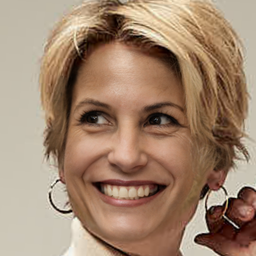

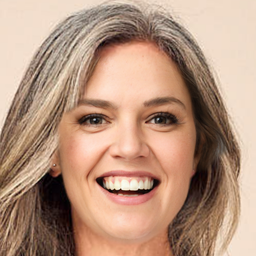

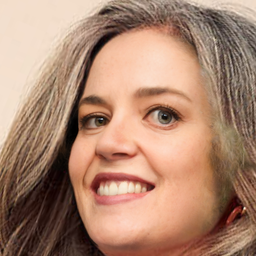

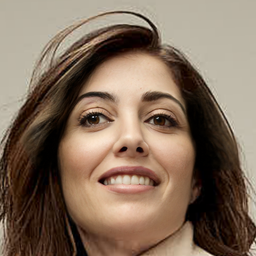

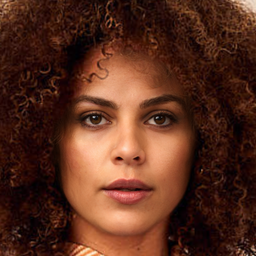

In [ ]:
path = "generated_images/"
for f in sorted(os.listdir(path)):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

In [ ]:
import keras

#model = keras.models.load_model('models/no_pca.keras')
useModel = nextcloud + 'skinRetouching/retouchML/models/no_pca.keras'
model = keras.models.load_model(useModel)

In [ ]:
import math
import pickle
import PIL.Image
import numpy as np

#import config
import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator
URL_FFHQ = 'https://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir="cache") as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

model_res = 1024
model_scale = int(2*(math.log(model_res,2)-1))

def generate_raw_image(latent_vector):
    latent_vector = latent_vector.reshape((1, model_scale, 512))
    generator.set_dlatents(latent_vector)
    return generator.generate_images()[0]

def generate_image(latent_vector):
    img_array = generate_raw_image(latent_vector)
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


#### Computing the gradient

In order to improve the face, we'll follow the gradient.
This should give us a better version of the image that is still close to the original image.

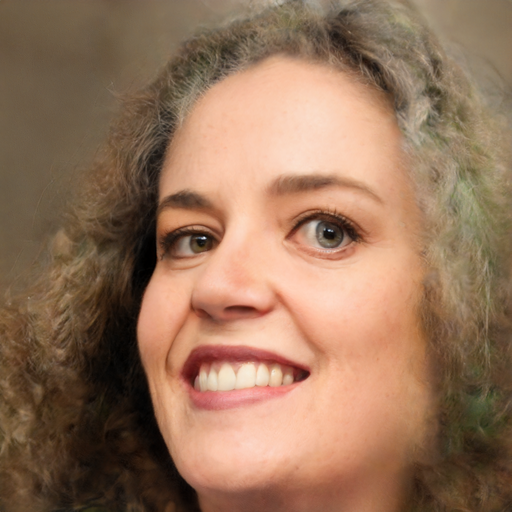

NameError: ignored

In [ ]:
import copy
from tqdm import tqdm

latent_vector = np.load('./latent_representations/LB_0001_01.npy')
img = generate_image(latent_vector)
display(img.resize((512,512),PIL.Image.LANCZOS))

predictions = model.predict(latent_vector).reshape(-1)
print(np.mean(predictions))


for x in range(2):
  x_tensor = tf.convert_to_tensor(latent_vector, dtype=tf.float32)

  with tf.GradientTape() as t:
      t.watch(x_tensor)
      output = model(x_tensor)

  gradients = tf.gradients(output, x_tensor)

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    result_output=np.array(sess.run(gradients)).reshape(18,512)

  latent_vector += result_output
  print(np.mean(model.predict(latent_vector)))
  img = generate_image(latent_vector)
  display(img.resize((512,512),PIL.Image.LANCZOS))

predictions = model.predict(latent_vector).reshape(-1)
print(predictions)

img = generate_image(latent_vector)
display(img.resize((512,512),PIL.Image.LANCZOS))
img.save("generated_images/LB_0001_01.png", "PNG")

In [ ]:
#/content/RetouchML/masks/IMG_20200209_150540_01.png
#/content/drive/My Drive/RetouchML/raw_images/pexels-anna-shvets-4672292.jpg
#/content/drive/My Drive/RetouchML/raw_images/pexels-sound-on-3756989.jpg
img_name = "LB_0001_01.jpg"
raw_path = "raw_images/" + img_name
out_path = "out/" + img_name
face_path = "generated_images/" 
mask_path = "masks/"
vector_path = "alignement_vector/"
!python fit_faces.py $raw_path $face_path $mask_path $vector_path $out_path


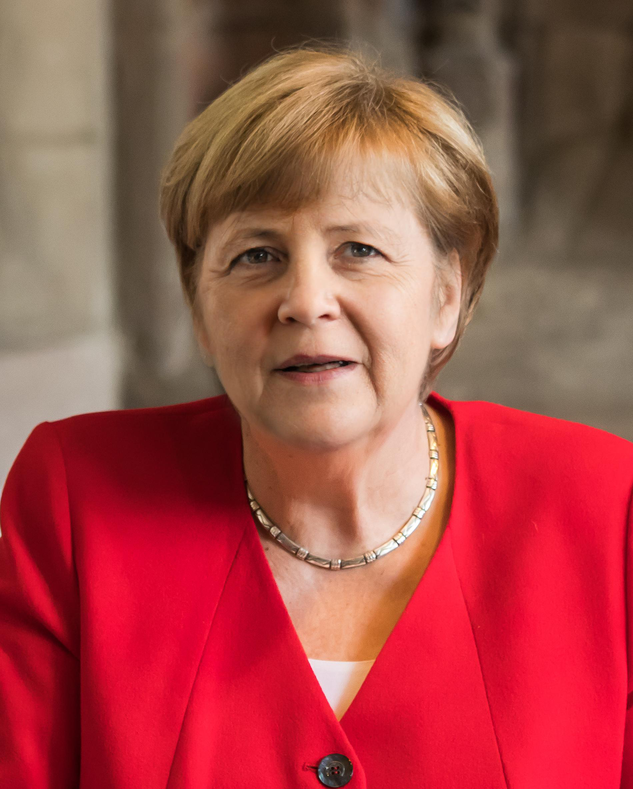

In [ ]:
path = "out/"
valid_images = (".jpg",".png")
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((int(img.size[0]/3), int(img.size[1]/3)), PIL.Image.LANCZOS))


#### Done

And that's it. The difference is subtle but in direct comaprison with the original images, you can clearly see the changes.